In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/bitcoin_date")
df2=pd.read_csv("/content/bitcoin_date")

In [ ]:
df['MA20']=df['Value'].rolling(20).mean() 
df['MA50']=df['Value'].rolling(50).mean() 
df=df.dropna() # drop the values in first 20 days
df2=df2[19:]
print(df2.index)

RangeIndex(start=95, stop=1826, step=1)


In [ ]:
df=df[['Value','MA20','MA50']]
df

,Value,MA20,MA50
19,609.39,601.985,606.3935
20,614.82,603.579,606.0520
21,612.98,605.135,606.2175
22,611.85,606.912,606.2640
23,609.62,607.486,606.3040
...,...,...,...
1821,51769.06,49093.547,48394.7485
1822,52677.40,49455.601,48796.1900
1823,46809.17,49246.753,48897.7555
1824,46078.38,48973.913,48864.9420


In [ ]:
#buying signal:if the moving average of 20 days is above moving average of 50 days, but less than the day before.
#selling signal: if the moving average of 50 days is above moving avg of 20 days, but isn't the day before
Buy=[]
Sell=[]

for i in range(len(df)):
  if df.MA20.iloc[i] > df.MA50.iloc[i]\
  and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
    Buy.append(i)
  elif df.MA20.iloc[i]<df.MA50.iloc[i]\
  and df.MA20.iloc[i-1]>df.MA50.iloc[i-1]:
    Sell.append(i)


In [ ]:
Buy

[3,
 116,
 186,
 298,
 363,
 464,
 505,
 563,
 619,
 645,
 695,
 723,
 753,
 772,
 814,
 832,
 865,
 895,
 991,
 1040,
 1074,
 1110,
 1124,
 1167,
 1184,
 1276,
 1303,
 1343,
 1382,
 1391,
 1451,
 1470,
 1589,
 1623,
 1647,
 1679,
 1720,
 1741,
 1762]

In [ ]:
Sell

[0,
 104,
 167,
 263,
 346,
 452,
 473,
 527,
 590,
 620,
 675,
 711,
 738,
 761,
 776,
 827,
 836,
 887,
 982,
 1021,
 1053,
 1085,
 1115,
 1140,
 1169,
 1242,
 1299,
 1334,
 1355,
 1390,
 1428,
 1461,
 1575,
 1615,
 1639,
 1667,
 1689,
 1729,
 1747]

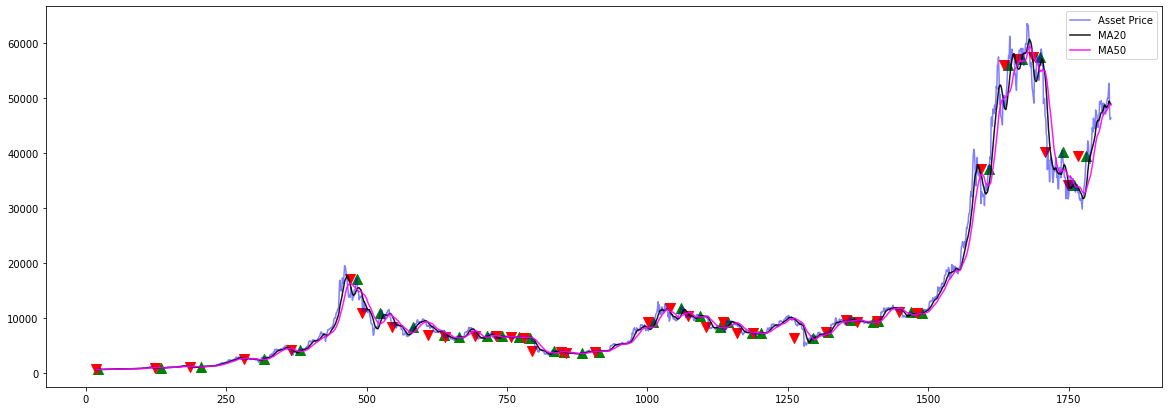

In [ ]:
plt.figure(figsize=[20,7])
plt.plot(df['Value'],label='Asset Price',c='blue', alpha=0.5)
plt.plot(df['MA20'],label='MA20',c='k',alpha=0.9)
plt.plot(df['MA50'],label='MA50',c='magenta',alpha=0.9)
plt.scatter(df.iloc[Buy].index,df.iloc[Buy]['Value'],marker="^",color='g',s=100)
plt.scatter(df.iloc[Sell].index,df.iloc[Buy]['Value'],marker="v",color='r',s=100)
plt.legend()
plt.show()

In [ ]:
amount=1000#initial amount of money
allocated_money=0
portfolio=0#inital number of bitcoins we held
money_end=amount#money that we have after the trade
investment=[]#a list that track the investment
transaction_rate=0.02#transaction fee rate

transaction_cost=[]


core_to_trade=True
core_quantity=0

In [ ]:
#trading simulation function
def buy(quantity,price):
  global portfolio,money_end
  allocated_money=quantity*price  #money is being traded=quantitiy of bitcoin*price of the bitcoin
  money_end=money_end-allocated_money-transaction_rate*allocated_money
  portfolio += quantity
  transaction_cost.append(transaction_rate*allocated_money)
  if investment == []:
    investment.append(allocated_money)
  else:
    investment.append(allocated_money)
    investment[-1]+= investment[-2]

    return(money_end,portfolio,transaction_cost)

IndexError: ignored

Int64Index([  19,   20,   21,   22,   23,   24,   25,   26,   27,   28,
            ...
            1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825],
           dtype='int64', length=1807)

SyntaxError: ignored